In [1]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("D:\\Data_House\\FuelConsumptionCo2.csv")

In [3]:
df1.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df1.shape

(1067, 13)

In [5]:
df=df1[['FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
df.rename(columns={'FUELCONSUMPTION_COMB_MPG':'comubstion', 'CO2EMISSIONS':'emission'},inplace=True)

C:\Users\Lenovo\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
df

,comubstion,emission
0,33,196
1,29,221
2,48,136
3,25,255
4,27,244
...,...,...
1062,24,271
1063,25,264
1064,24,271
1065,25,260


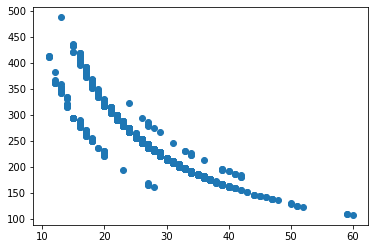

In [7]:
plt.scatter(df.comubstion, df.emission)

In [8]:
X=df.iloc[:,0:1].values
y=df.iloc[:,-1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [12]:
L.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred=L.predict(X_test)

In [14]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8261445883060663
RMSE 27.0911073218799


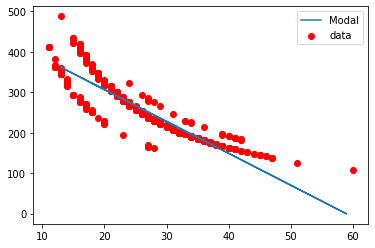

In [15]:
plt.plot(X_test,L.predict(X_test),label="Modal")
plt.scatter(X_train,y_train,label="data", color="r")
plt.legend()
plt.show()

# Polynomial Regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)

In [17]:
X_poly = poly.fit_transform(X_train)
print(X_poly.shape)
X_poly

(853, 11)


array([[1.00000000e+00, 2.20000000e+01, 4.84000000e+02, ...,
        5.48758735e+10, 1.20726922e+12, 2.65599228e+13],
       [1.00000000e+00, 1.90000000e+01, 3.61000000e+02, ...,
        1.69835630e+10, 3.22687698e+11, 6.13106626e+12],
       [1.00000000e+00, 2.70000000e+01, 7.29000000e+02, ...,
        2.82429536e+11, 7.62559748e+12, 2.05891132e+14],
       ...,
       [1.00000000e+00, 2.40000000e+01, 5.76000000e+02, ...,
        1.10075314e+11, 2.64180754e+12, 6.34033810e+13],
       [1.00000000e+00, 2.10000000e+01, 4.41000000e+02, ...,
        3.78228594e+10, 7.94280047e+11, 1.66798810e+13],
       [1.00000000e+00, 2.50000000e+01, 6.25000000e+02, ...,
        1.52587891e+11, 3.81469727e+12, 9.53674316e+13]])

In [18]:
L1 = LinearRegression()
L1.fit(X_poly,y_train)

LinearRegression()

In [19]:
X_test_poly =poly.fit_transform(X_test)

In [20]:
y_pred=L1.predict(X_test_poly)

In [21]:
print("R2 score",r2_score(y_test,y_pred))
print("MSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8952659680760404
MSE 21.026963521455396


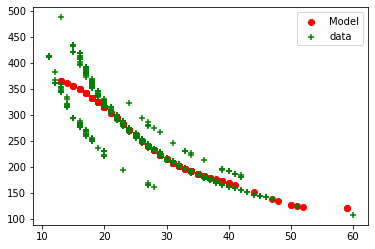

In [22]:
plt.scatter(X_test,y_pred, label="Model",color='red')
plt.scatter(X_train, y_train, label="data", marker='+',color='green')
#plt.scatter(X,y,label="Training data")
plt.legend()
plt.show()

In [23]:
def polynomialRegression(X,y,k=14):

  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

  poly = PolynomialFeatures(degree=k)
  X_poly = poly.fit_transform(X_train)
  lr = LinearRegression()
  lr.fit(X_poly,y_train)
  
  X_test_poly =poly.fit_transform(X_test)
  y_pred=lr.predict(X_test_poly)

  training_score = r2_score(y_train, lr.predict(X_poly))
  test_score = r2_score(y_test,y_pred)
  
  return training_score, test_score

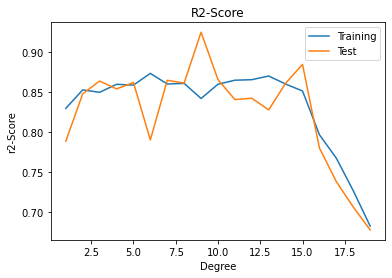

In [24]:
train=[]
test=[]
for i in range(1,20):
  r2train,r2test=polynomialRegression(X,y,k=i)
  train.append(r2train)
  test.append(r2test)
x=np.arange(19)+1
plt.plot(x,train,label="Training")
plt.plot(x,test,label="Test")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("r2-Score")
# plt.xlim((1, 15))
# plt.ylim((-3, 2))
plt.title("R2-Score");
plt.show()